<div>
    <img src="https://www.universitylanguageschool.com/wp-content/uploads/2017/04/wdlwordle2.jpg" width="800">
</div>

# Why Is English So Difficult?

If you've ever tried learning a language, you have no doubt hit a wall and become frustrated at how difficult it can be to retain, understand, and utilize what you've learned. For native English speakers, the hardest languages to learn are Arabic, Japanase, Korean, and Mandarin Chinese. However, if you were born in a non-English speaking country, you might think that English is the hardest language to learn. [Why](https://wordcounter.net/blog/2017/01/05/102792_english-hardest-language.html) would that be? According to [Babbel.com](https://www.babbel.com/en/magazine/the-10-most-spoken-languages-in-the-world), English is the third most spoken language with roughly **370+ million** native speakers. The #1 and #2 positions would go to Chinese (**1.3 billion**) and Spanish (**471 million**), respectively. According to [Ethnologue](https://www.ethnologue.com/), English is the language with the largest number of second language speakers, with over **1.08 billion**! That's roughly 4x more than the next highest language!

<figure>
    <img src="https://i.imgur.com/LKTXzEZ.png">
    <figcaption align = "center">Fig.1 - List of First & Second Language Speakers</figcaption>
</figure>

And yet English, given its long [history](https://www.psychologytoday.com/us/blog/language-in-the-mind/201702/why-english-is-such-difficult-language-learn), is often stated as being one of the most [confusing](https://owlcation.com/humanities/Examples-Of-Why-The-English-Language-Is-So-Confusing), [non-sensical](https://reword.ca/5-examples-of-how-the-english-language-makes-no-sense-at-all/) languages in the world. I have some experience in this field, as I was an English teacher in South Korea for 6 years. I have taught everything from kindergartners to high-schoolers, and I have heard every complaint and frustration imaginable. I know my adult Korean friends also express a certain level of disdain when it comes to learning English because to them it simply makes [no](https://thelanguagedoctors.org/is-english-hard-to-learn/#:~:text=The%20English%20language%20is%20widely,both%20learners%20and%20native%20speakers.) [sense](https://www.vox.com/2015/7/21/9003299/spelling-reform).

I want to know what areas of English learners struggle with the most. To do that, I will be digging into the [English Stack Exchange](https://english.stackexchange.com/) website to query its database and analyze the results. I hope to gain some insights on what kinds of areas are asked about the most.

## Project Goals
* Query database and gather data
* Clean, refine, and organize data
* Analyze data to find most common trouble areas
* Investigate if there are any unique patterns or correlations
* Incorporate any third-party information
* Create helpful visualizations

# Initial Exploration of the English Stack Exchange

By navigating to the home of the English Stack Exchange we can get familiar with its structure.

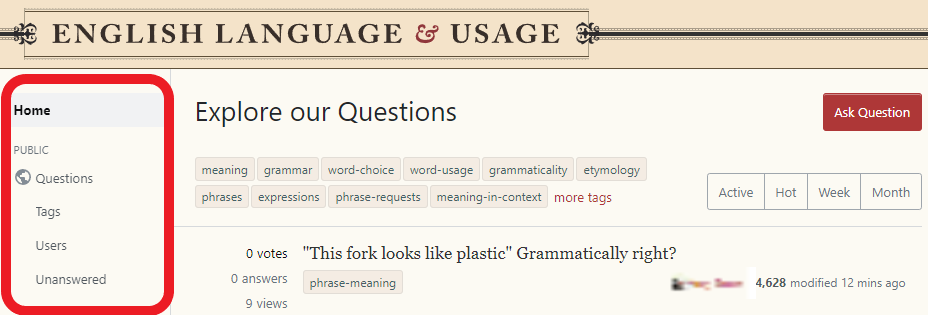

We can see on the far left that there are dedicated sections for Questions, Tags, Users, and Unanswered questions. On every Stack Exchange site users can "tag" their posts with a relevant tag, so that others can find it easier. This will be very helpful in our project. You can have a limit of 5 tags per post, so it encourages people to think about the essence of their question, instead of spamming every tag on every post. We can easily see a sample of tags from the image: meaning, grammar, phrases, etc. If we click on the Tags button on the left, it takes us to a page with more in-depth explanation of each tag.

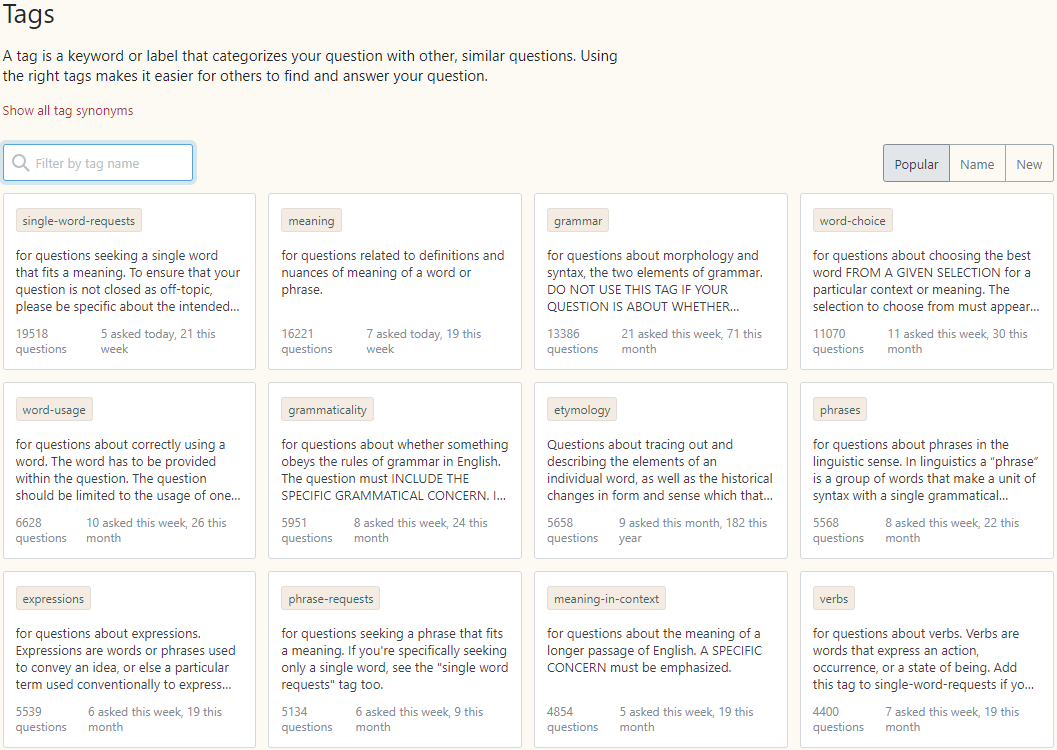

This is a fantastic resource for us, as we'll be using it extensively. Every Stack Exchange website provides a [public data base](https://data.stackexchange.com/english/query/new) that users can query via SQL commands. We can even save the query results to a .csv file, and import them as a pandas DataFrame for use with our project.

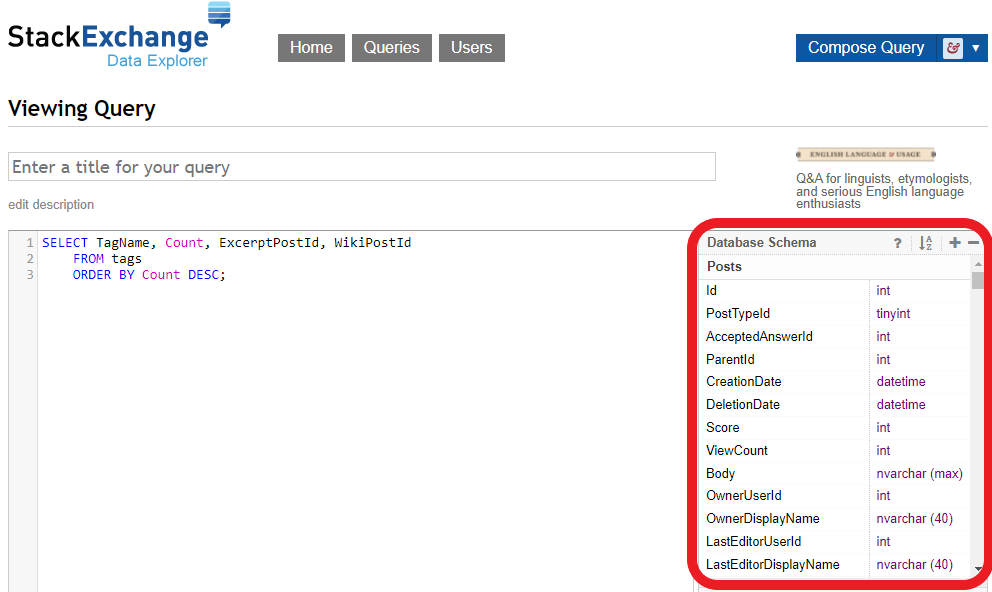

Above is what the query page looks like. On the right, we can see a detailed schema of how the database is laid out, as well as the datatype for each attribute. We can see all kinds of relevant information that we can query for Posts, Comments, Users - basically everything we could ever need from this site. If we run the following SQL query, we will get back all the information from `tags` (the following is just a snippet of all the tags).

```
  SELECT *
    FROM tags
ORDER BY Count DESC;
```
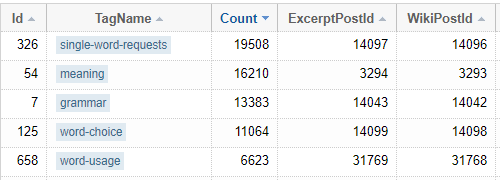

We can clearly see the `TagName` and `Count` values, which will be immensely helpful for us. We can also see that `single-word-requests` is the most used tag, followed by `meaning`, and `grammar`. So right away we can see that definitions of words/phrases, and grammar are the most common areas that people are asking about. If we run the following query, we can see information on the `PostTypes`:

```
SELECT *
  FROM PostTypes;
```

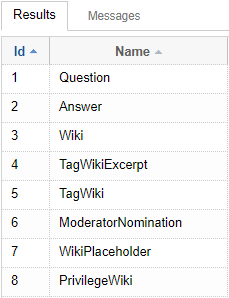

So we can see that there are eight types of Posts. The first two are obvious, but the remaining six aren't especially clear - let's keep digging. If we look at the database schema under `Posts` we can see that it contains a lot of relevant, useful information to us:

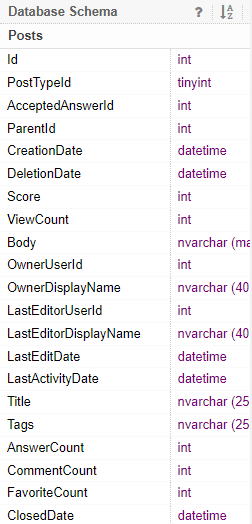

We can clearly see from the above that each post made on the StackExchange contains the following information:

* `Id` - a unique identifier for each post.
* `PostTypeId` - an identification number for the type of post.
* `CreationDate` - the time of creation of the post.
* `Score` - the score (or upvotes) of the post.
* `ViewCount` - how many times the post was viewed.
* `Tags` - the relevant tags that were used for the question.
* `AnswerCount` - how many answers the question received (only for question posts)
* `FavoriteCount` - how many times the question was favored (only for question posts)

Since we have seen that there are eight different types of posts, lets go ahead and see how many of them there are by running the following query:

```
SELECT PostTypeId,
       COUNT(*) as Num_posts
  FROM Posts
 GROUP BY PostTypeId;
```

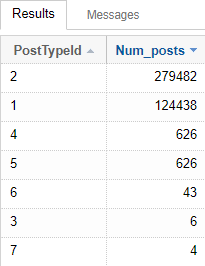

We know from our earlier query that an ID of 1 = `Question`, and an ID of 2 = `Answer`. Interestingly, there are more than twice as many `Answers` as there are `Questions`. Since we really only care about these two types of `Posts`, the others are inconsequential.

Finally, we want to keep our data relatively recent (at the time of writing it is March 2022), so we can do one more query against the StackExchange to find all the relevant information from the past 5 years (March 2017 - March 2022).

```
SELECT Id,
       PostTypeId,
       CreationDate,
       Score,
       ViewCount,
       Tags,
       AnswerCount,
       FavoriteCount
  FROM Posts
  WHERE PostTypeId = 1 AND CreationDate BETWEEN '3/17/2017' AND '3/17/2022'
 ORDER BY CreationDate;
 ```
 
 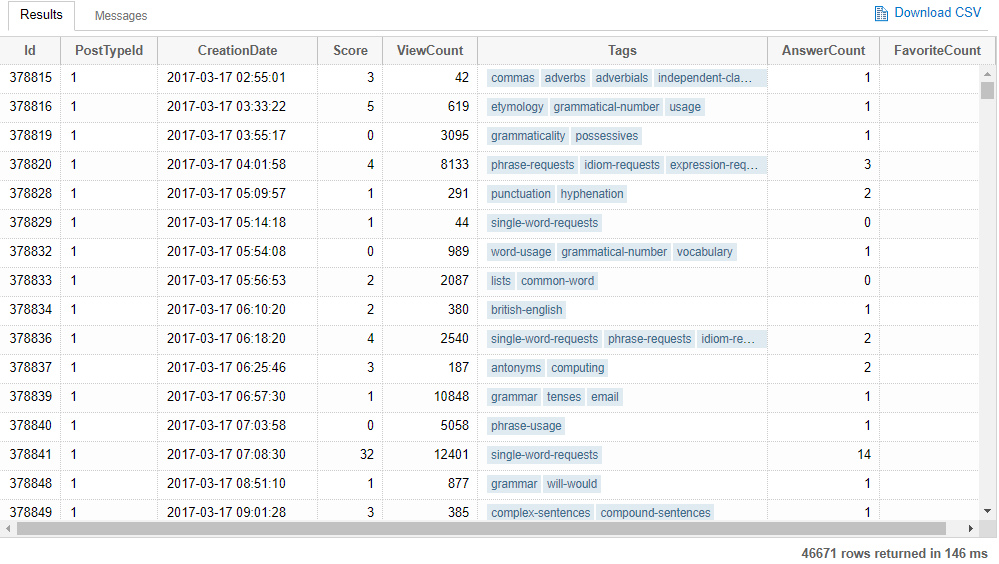
 
 This gives us a dataset of 46,600+ questions to analyze. We can download the query result as a .csv and import it using pandas.
 
 # Import Libraries & Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
from functools import reduce

# Initial Data Exploration

In [2]:
data = pd.read_csv('QueryResults_5y.csv', parse_dates=["CreationDate"])
data

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,378815,1,2017-03-17 02:55:01,3,42,<commas><adverbs><adverbials><independent-clau...,1,NaN
1,378816,1,2017-03-17 03:33:22,5,619,<etymology><grammatical-number><usage>,1,NaN
2,378819,1,2017-03-17 03:55:17,0,3095,<grammaticality><possessives>,1,NaN
3,378820,1,2017-03-17 04:01:58,4,8133,<phrase-requests><idiom-requests><expression-r...,3,NaN
4,378828,1,2017-03-17 05:09:57,1,291,<punctuation><hyphenation>,2,1.0
...,...,...,...,...,...,...,...,...
46666,585914,1,2022-03-12 17:47:54,1,27,<meaning-in-context>,1,NaN
46667,585917,1,2022-03-12 20:13:00,1,45,<usage><pronunciation><contemporary-english><s...,1,1.0
46668,585920,1,2022-03-12 21:31:02,-1,38,<punctuation><writing-style><writing><literatu...,2,NaN
46669,585923,1,2022-03-12 23:48:10,0,22,<verb-agreement><disjunction>,1,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46671 entries, 0 to 46670
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             46671 non-null  int64         
 1   PostTypeId     46671 non-null  int64         
 2   CreationDate   46671 non-null  datetime64[ns]
 3   Score          46671 non-null  int64         
 4   ViewCount      46671 non-null  int64         
 5   Tags           46671 non-null  object        
 6   AnswerCount    46671 non-null  int64         
 7   FavoriteCount  9428 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.8+ MB


# Data Cleaning
## Missing Values
From the above we can quickly see that our `FavoriteCount` column has a lot of null values. We only have 9,428 values for that column, which is **~20.2%** of the total data for that column. `FavoriteCount` simply represents the number of times another user "favorited" that question, signifying that they thought it was particularly helpful, useful, etc. A missing value for this column simply means no users "favorited" the post, so instead of removing all those rows, we can instead replace the missing values with zeros.

In [4]:
#fill in missing values with a zero
data.fillna(0, inplace=True)

#change data type to int64
data["FavoriteCount"] = data["FavoriteCount"].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46671 entries, 0 to 46670
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             46671 non-null  int64         
 1   PostTypeId     46671 non-null  int64         
 2   CreationDate   46671 non-null  datetime64[ns]
 3   Score          46671 non-null  int64         
 4   ViewCount      46671 non-null  int64         
 5   Tags           46671 non-null  object        
 6   AnswerCount    46671 non-null  int64         
 7   FavoriteCount  46671 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 2.8+ MB


## Removing Redundant Information

Since our initial query specified that we only want PostTypeId to be 1, we can go ahead and remove that column from our data, as it no longer serves a purpose.

In [5]:
data.drop('PostTypeId', axis=1, inplace=True)

## Cleaning "Tags" Column

In [6]:
#shows us the data type of each tag
data["Tags"].apply(lambda t: type(t)).value_counts()

<class 'str'>    46671
Name: Tags, dtype: int64

We can see that each value in the column is a string. On Stack Exchange, each post can have a maximum of five tags. We could have five separate columns for each tag, but let's leave the structure alone for now. Instead, let's clean up the strings to make them easier to read.

In [7]:
data['Tags'].head(10)

0    <commas><adverbs><adverbials><independent-clau...
1               <etymology><grammatical-number><usage>
2                        <grammaticality><possessives>
3    <phrase-requests><idiom-requests><expression-r...
4                           <punctuation><hyphenation>
5                               <single-word-requests>
6         <word-usage><grammatical-number><vocabulary>
7                                 <lists><common-word>
8                                    <british-english>
9    <single-word-requests><phrase-requests><idiom-...
Name: Tags, dtype: object

We need to remove the angled brackets (<>) and put a space between each tag. The [str.replace()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) and [str.split()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) methods will do the trick.

In [8]:
data['Tags'] = data['Tags'].str.replace(r'^<|>$','', regex=True).str.split('><')
data['Tags'].head(10)

0    [commas, adverbs, adverbials, independent-clau...
1               [etymology, grammatical-number, usage]
2                        [grammaticality, possessives]
3    [phrase-requests, idiom-requests, expression-r...
4                           [punctuation, hyphenation]
5                               [single-word-requests]
6         [word-usage, grammatical-number, vocabulary]
7                                 [lists, common-word]
8                                    [british-english]
9    [single-word-requests, phrase-requests, idiom-...
Name: Tags, dtype: object

# Data Analysis
## Base Statistics

Now that they're cleaned up a bit, let's get some more information on this data. Let's see some basic statistics first.

In [9]:
data[['Score', 'ViewCount', 'AnswerCount', 'FavoriteCount']].describe()

,Score,ViewCount,AnswerCount,FavoriteCount
count,46671.000000,46671.000000,46671.000000,46671.000000
mean,1.491097,1476.323306,1.567676,0.275203
std,4.915607,6336.611867,1.665889,1.074983
min,-7.000000,4.000000,0.000000,0.000000
25%,0.000000,63.000000,1.000000,0.000000
50%,0.000000,160.000000,1.000000,0.000000
75%,2.000000,784.000000,2.000000,0.000000
max,426.000000,482289.000000,32.000000,151.000000


From the above we can make a few observations:
* **Scores** range from -7 to 426
* **ViewCounts** range from 4 to 482,289
* **AnswerCounts** range from 0 to 32
* **FavoriteCounts** range from 0 to 151

## Tag Counts

Now let's count how many times each tag was used. We can create a dictionary where the key is the tag, and the value is the number of times it was used.

In [10]:
#get tag count
tag_count = {}
for row in data["Tags"]:
    for tag in row:
        if tag not in tag_count:
            tag_count[tag] = 0
        tag_count[tag] += 1

#function to create df from dictionary
def df_from_dict(dictionary, col):
    #convert to df
    df = pd.DataFrame.from_dict(dictionary, orient='index')
    df.rename(columns={0:col}, inplace=True)

    #sorts by `col`
    df = df.sort_values(col,ascending=False)
    return df, df.head(20)

tag_used, top20_tags = df_from_dict(tag_count, 'Count')
top20_tags

,Count
single-word-requests,7648
grammar,6231
meaning,5347
word-choice,2824
word-usage,2787
grammaticality,2048
phrase-requests,1977
meaning-in-context,1968
expressions,1941
phrases,1826


In [11]:
def reformat_large_tick_values(tick_val, pos):
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            #remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

#function to plot horizontal bar chart of data[x_data]
def plot_dist(data, x_data, title='', subtitle=''):
    #figure setup
    fig = plt.figure(figsize=(15,8))
    
    #margin setup for titles & signature
    t_margin  = data[x_data].max()*-0.15
    st_margin = data[x_data].max()*-0.17
    
    #plot
    ax = sns.barplot(data=data, x=x_data, y=data.index, palette='flare')
    ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
    
    #vertical line
    ax.axvline(x=0, color='black', linewidth=10, alpha=.7)
    ax.yaxis.label.set_visible(False)
    ax.xaxis.label.set_visible(False)

    #title & subtitle
    ax.text(x=t_margin, y=-2.5, s=title, fontsize=28, weight='bold', alpha=.75)
    ax.text(x=t_margin, y=-1.4, s=subtitle, fontsize=21, alpha=.85)
    
    #signature bar
    ax.text(x=st_margin, y=21,
            s=' ©NoahGampe' + ' '*172 + ' Source: English Stack Exchange',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey')
    
    plt.show()

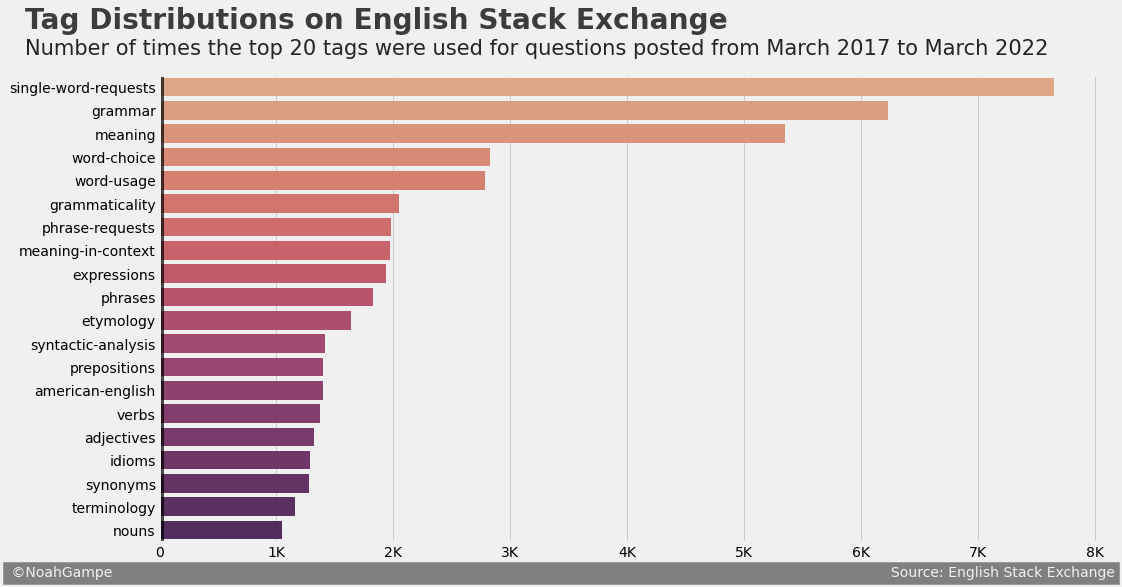

In [12]:
title = 'Tag Distributions on English Stack Exchange'
subtitle = 'Number of times the top 20 tags were used for questions posted from March 2017 to March 2022'
plot_dist(top20_tags, 'Count', title, subtitle)

At this point we can logically assume that the number of times a tag was added to a post strongly affects things like `Score`, `ViewCount`, `AnswerCount`, and `FavoriteCount`. We'll inspect those shortly, but first we'll create the dataframes for each of the columns in interest and merge them into one dataframe, preserving all the entries. Additionally, we'll create the top 20 tags dataframes for these columns (using the functions we just defined).

In [ ]:
#function for finding popular tags by column
def find_popular_tags(column_name, new_column_name):
    #dictionary for all the tags
    tags_dict = {}
    for _, row in data.iterrows():
        tags = row['Tags']
        popularity_measure = row[column_name]
        for tag in tags:
            if tag not in tags_dict:
                tags_dict[tag] = 0
            tags_dict[tag] += popularity_measure
            
    #create dataframe from the dictionary, sorted in descending order
    tags_df, top20_df = df_from_dict(tags_dict, new_column_name)            
    return tags_df, top20_df

tag_scores, top20_scores = find_popular_tags('Score', 'Scores')
tag_views, top20_views = find_popular_tags('ViewCount', 'Views')
tag_answers, top20_answers = find_popular_tags('AnswerCount', 'Answers')
tag_favorites, top20_favorites = find_popular_tags('FavoriteCount', 'Favorites')

all_dfs = [tag_used, tag_scores, tag_views, tag_answers, tag_favorites]
tags_merged = pd.concat(all_dfs, axis=1)

In [ ]:
tags_merged.head(10)

## Tag Views

We can see that the two most often used tags are `single-word-requests` and `grammar` - arguably two areas of English that are more than confusing for learners. Also, some of the tags may seem a little redundant. For example, `meaning` and `meaning-in-context` both pertain to what a word or phrase means. Similarly, `grammar` and `grammaticality` would both focus on grammar. Before we dig into that issue further, let's repeat this same process based on ViewCount instead.

In [ ]:
top20_views

In [ ]:
title = 'Tag View Distributions on English Stack Exchange'
subtitle = 'Number of times each of the top 20 tags was viewed from March 2017 to March 2022'
plot_dist(top20_views, 'Views', title, subtitle)

We can clearly see that `single-word-requests` has roughly **13 million** views, almost 1.5x that of the next highest-viewed tag, `grammar`. This is rather insightful, as it implies that a lot of people are simply seeking a single word that fits a meaning. That is a very common encounter when it comes to learning languages, one that I've asked many times about the Korean language, so it would definitely make sense that it happens with English as well.

## Tag Scores

In [ ]:
title = 'Tag Score Distributions on English Stack Exchange'
subtitle = 'Scores for the top 20 tags from March 2017 to March 2022'
plot_dist(top20_scores, 'Scores', title, subtitle)

It seems that `single-word-requests` is by far the highest-viewed, *and* the highest-scored tag, with scores totaling more than `etymology` and `meaning` *combined*. It's important to note that even though `single-word-requests` dominates in the score category, the overall number of scores is rather low for five years worth of questions. It's possible that people are not voting for the correct answers, or perhaps they simply don't care about the score system.

## Tag Answers

In [ ]:
title = 'Answer Distributions on English Stack Exchange'
subtitle = 'Number of answers for the top 20 tags from March 2017 to March 2022'
plot_dist(top20_answers, 'Answers', title, subtitle)

Again, `single-word-requests` is the tag with the most answers *by far*, more than doubling that of the next highest tag, `meaning`. This is lining up with our previous assumption that the number of times a tag gets used affects the other attributes (views, scores, answers, etc.)

## Tag Favorites

In [ ]:
title = 'Favorite Distributions on English Stack Exchange'
subtitle = 'Number of favorites for the top 20 tags from March 2017 to March 2022'
plot_dist(top20_favorites, 'Favorites', title, subtitle)

A "favorite" is when a user finds a question/answer particularly helpful. It is a way for them to "save" answers for reference later. Here we can clearly see that `single-word-requests` is again the most favorited tag, with just over 2,500 favorites (roughly 33% of the number of times it was used).

## Feature Correlation

How strongly are these features correlated with one another? We can plot a simple heatmap and find out.

In [ ]:
#plot correlation heatmap
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(tags_merged.corr(), annot=True, fmt='.3g', square=True, cmap='rocket')
ax.set_title('Popularity Measures Correlation', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.tick_params(bottom=False, left=False)
plt.show()

We can see that all of the features are strongly correlated, which means our assumption was correct. This means that the topics (reflected by the tag names) that stir the biggest interest among people asking questions usually attract more views and gather more answers, scores, and favorites. The strongest correlation is between Count and Views - which makes sense because the more people use a tag, the more likely it is to be seen by another user. Interestingly enough, the "weakest" correlation is between Count and Scores. This sounds a bit opposite from our initial assumption (that the more a tag gets used, the higher the other metrics will be), however it's just that the number of Views, Answers, and Favorites had a bigger impact on the overall score of a given tag.

## Which Tags Appear in All of the Top 20 Dataframes?

In [ ]:
#list of the top20 dataframes
df_top20 = [top20_tags, top20_scores, top20_views, top20_answers, top20_favorites]

#creating merged dataframe for all the top20 dataframes
top20_merged = reduce(lambda left,right: pd.DataFrame.join(left, right, how='inner'), df_top20)

print('Number of tags occuring in all the top20 dataframes: ', len(top20_merged))
top20_merged

What does the above mean? It means that there are a total of thirteen tags that show up in *all five* of our top20 dataframes, which confirms once again a very strong correlation between the popularity metrics. We'd like to plot these 13 popular tags together with the corresponding values of their popularity metrics, but since they all have quite different ranges, it's necessary to normalize them first. This will put them all on a similar scale (from 0 to 1) so that the plots will behave nicely.

In [ ]:
#normalizing the merged dataframe
top20_merged_normalized = top20_merged.copy()
indexes = top20_merged_normalized.index.tolist()
columns = top20_merged_normalized.columns.tolist()
for column in columns:
    top20_merged_normalized[column] /= top20_merged_normalized[column].abs().max()
    
top20_merged_normalized

In [ ]:
#creating a melted dataframe from the merged dataframe for better plotting
top20_melted = pd.melt(top20_merged_normalized, value_vars=columns,
                       var_name='Metric', value_name='Value', ignore_index=False)
top20_melted

In [ ]:
def plot_metric_comp(df):    
    #creating a dot plot for the most popular tags
    fig = plt.subplots(figsize=(10,10))

    #plot
    ax = sns.scatterplot(data=df, x='Value', y=df.index, hue='Metric', s=500, alpha=0.6)
    ax.set_xlim(-0.02,1.05)
    
    #margin setup for titles & signature
    t_margin  = -0.30
    st_margin = -0.33

    #vertical line
    ax.axvline(x=0, color='black', linewidth=3, alpha=.7)

    #legend
    leg = ax.legend(loc=4, bbox_to_anchor=(0.95,0.007), fontsize=16, markerscale = 3.2, frameon=False)
    for lh in leg.legendHandles: 
        lh.set_alpha(0.75)
    
    #labels & ticks
    ax.yaxis.label.set_visible(False)
    ax.xaxis.label.set_visible(False)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    #title & subtitle
    title = 'Most Popular Tags'
    subtitle = 'Metrics of most popular tags for March 2017 to March 2022'
    ax.text(x=t_margin, y=-1.6, s=title, fontsize=28, weight='bold', alpha=.75)
    ax.text(x=t_margin, y=-1.0, s=subtitle, fontsize=21, alpha=.85)

    #signature bar
    ax.text(x=st_margin, y=(len(df)/5)+0.6,
            s=' ©NoahGampe' + ' '*105 + ' Source: English Stack Exchange',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey')

    plt.show()
    
plot_metric_comp(top20_melted)

## Observations

From our scatterplot above we can observe several things:
* `single-word-requests` is clearly the most popular tag in every metric.
* `grammar` is the second most used tag, yet it has extremely low answers and even lower scores relative to how much it gets used.
* `meaning` is the third most used and viewed, yet it has more scores and answers than `grammar`.
* The tags `expressions`, `phrases`, `etymology`, and `american-english`, all have a low number of answers relative to their other respective metrics.
* `etymology` stands out a bit because it has a much higher number of scores relative to the number of times it has been used.
* Ideally, every time a tag gets used, it would receive an answer. On the graph that would mean the blue and green dots would overlap. The larger the gap means the higher the number of questions that did not receive an answer.

# Engaging Domain Knowledge

Now what can we learn from everything we've seen so far? Obviously we are confident in the fact that `single-word-requests` is the most popular and used tag of the bunch, but what else? As someone who has been an ESL teacher before, I can confidently say this:  

**Vocabulary** and **grammar** are the two most important, yet often glanced over, areas of learning English.  

In my experience as a teacher, the majority of the time English-learners just don't know the word they want to use. They'll have the grammar portion figured out, but their vocabularly is lacking. Conversely, though less likely in my experience, they can have an extensive vocabulary, but they don't know how to implement it. In the numerous schools I have worked at, a lot of emphasis was put on speaking and writing, but very little on pure vocabulary and grammar.

To give a more concrete example - at one school I worked at, where I was the student's main English teacher, out of the 19 classes a week I spent with them, only ***ONE*** was focused on grammar. These students didn't have a dedicated vocabulary class either, though I believe management had assumed that they would "pick it up" during other classes - which to their defense, I can partially agree with. Students tend to learn a single word for a particular meaning, and cling to that word relentlessly. I can speak from experience with learning Korean - learning a "base" word feels very safe, and you tend to use what you know a lot more because you're comfortable with it. Looking at the top 5 of our tags clearly shows that people are more concerned about vocabulary than anything else.

* `single-word-requests` - for questions seeking a single word that fits a meaning
* `meaning` - for questions related to definitions and nuances of meaning of a word or phrase
* `word-choice` - for questions about choosing the best word from a given selection for a particular context or meaning
* `word-usage` - for questions about correctly using a word
* `grammar` - for questions about morphology and syntax, the two elements of grammar

It's safe to say that learning a language isn't so black & white. There are many areas of study that overlap - but you can argue that four of those tags could fall under the "vocabulary" category. As a former teacher, I feel confident in saying that **vocabulary** is one of the biggest hurdles to get over with English. English words are incredibly difficult for non-native speakers because the word origins come from literally [all over the world](https://www.vox.com/2015/3/3/8053521/25-maps-that-explain-english), which is a huge reason why pronounciation is so difficult for learners.

# Analyzing "single-word-request" Tag Over Time

Let's examine ALL the data that goes back to 2009 and see if there has always been a huge discrepancy between `single-word-requests` and other tags. We'll have to query the database one more time, but the database only returns up to 50,000 rows at once, so we'll have to combine multiple query results into a single dataframe, and then merge that dataframe with our original working data.

In [ ]:
#all data - need to combine multiple datasets, clean, then combine with old `data`
data_1 = pd.read_csv('QueryResults_1.csv', parse_dates=["CreationDate"])
data_2 = pd.read_csv('QueryResults_2.csv', parse_dates=["CreationDate"])
data_3 = pd.read_csv('QueryResults_3.csv', parse_dates=["CreationDate"])
data_all_merged = pd.concat([data_1, data_2, data_3], axis=0)

#fill in missing values with a zero
data_all_merged.fillna(0, inplace=True)

#change data type to int64
data_all_merged["FavoriteCount"] = data_all_merged["FavoriteCount"].astype('int64')

#drop unneeded column
data_all_merged.drop('PostTypeId', axis=1, inplace=True)

#clean tags column
data_all_merged['Tags'] = data_all_merged['Tags'].str.replace(r'^<|>$','', regex=True).str.split('><')

#merge with original dataframe
data_all = pd.concat([data_all_merged, data], axis=0)

data_all

In [ ]:
#create list of all unique tags ever used
all_tags = []
for tags in data_all['Tags']:
    for tag in tags:
        if tag not in all_tags:
            all_tags.append(tag)
            
#create list of sets of tags for each question that has `single-word-request` tag
swr_tags = []
for tags in data_all['Tags']:
    if 'single-word-requests' in tags:
        swr_tags.append(tags)

#create dictionary of all tags used in combination with `single-word-request`
#and their frequencies
swr_tags_dict = {}
for tags in swr_tags:
    for tag in tags:
        if tag not in swr_tags_dict:
            swr_tags_dict[tag] = 0
        swr_tags_dict[tag] += 1
        
#sorting the dictionary
sorted_swr_tags_dict = dict(sorted(swr_tags_dict.items(), key = lambda x: x[1], reverse = True))

print(f'Number of questions on English Stack Exchange: {len(data_all)}')
print(f'Number of questions with `single-word-requests` tag: {len(swr_tags)} ({round(len(swr_tags)/len(data_all)*100,2)}%)')
print(f'Number of unique tags: {len(all_tags)}')
print(f'Number of unique tags associated with `single-word-requests`: {len(swr_tags_dict)} ({round(len(swr_tags_dict)/len(all_tags)*100,2)}%)')

At the time of writing there are currently 124,438 questions using 981 unique tags on the English Stack Exchange. Of those questions, 15.68% of them contain the `single-word-requests` tag. To further examine this, we could create a dictionary to narrow down the tags that were used alongside `single-word-requests` - but only include those tags that could be directly related to *single* word requests. To do this, let's make sure the tags have been used multiple times, as (we'll see below) there are many tags that were only used a single time. The reason behind this is to get a more general sense of what kinds of questions people are asking, instead of the numerous "one-off" questions that are more obscure in nature. After some experimentation, I've found that filtering out tags that have been used fewer than 40 times removes the most number of tags. From there, we can manually go through the tags and decide which ones to keep. This process could probably be automated through some sort of correlation technique, but manually picking them (and engaging my related domain knowledge) will hopefully give us more value for the data.

In [ ]:
def value_greater_than(dictionary, val):
    filtered = dict((k, v) for k, v in dictionary.items() if v >= val)
    print(f'Tags in dictionary: {len(filtered)}')
    return filtered

filtered = value_greater_than(sorted_swr_tags_dict, 1)
filtered = value_greater_than(sorted_swr_tags_dict, 20)
filtered = value_greater_than(sorted_swr_tags_dict, 40)

#based off of tags in filtered dictionary
related_tags = ['is-it-a-word', 'connotation', 'business-language', 'kinship-terms',
                'neologisms', 'meaning-in-context', 'adverbs', 'etymology', 'grammar',
                'slang', 'translation', 'hypernyms', 'pejorative-language', 'antonyms',
                'vocabulary', 'word-usage', 'verbs', 'meaning', 'terminology',
                'adjectives', 'synonyms', 'nouns', 'word-choice', 'single-word-requests']

print(f'\n`single-word-requests` related tags: {len(related_tags)}')

swr_related_tags = dict((k,v) for k, v in filtered.items() if k in related_tags)
swr_related_tags

Since we want to track the usage of `single-word-requests` over time, we'll have to take a look at the `CreationDate` column of our dataframe - specifically, we'll need to see when the first and last questions using the tag were posted.

In [ ]:
print(f'First question asked: {data_all["CreationDate"].min()}')
print(f'Last question asked: {data_all["CreationDate"].max()}')

It seems the very first question that used the`single-word-requests` tag was posted in mid-2009. This is our lower-limit of our timeframe. Since this project is focused on things directly related to the Stack Exchange platform, it's a bit limited in scope - since the English language goes back further than 2009. This means we don't necessarily need to worry about any potential discrepancies in our `CreationDate` column.  

As for the upper-limit, we'll have to figure out how to divide the data into different time periods. Dividing the time data into quarters seems like a rational choice, and one that is common in most time-related queries. Since it is currently mid-March 2022 at the time of writing, we'll need to exclude everything from this year, for the sake of consistency.

In [ ]:
#the .copy() ensures we don't trigger the SettingWithCopyWarning
data_all = data_all.loc[data_all['CreationDate'].dt.year < 2022].copy()

Let's go ahead and add a couple of columns to the dataframe:
* `swr_related` - showing if a question contains a tag related to `single-word-requests`
* `Quarter` - showing the year and quarter the question was posted

In [ ]:
#function to identify question that uses swr_related tag
def classify_swr(tags):
    for tag in tags:
        if tag in swr_related_tags:
            return 1
    return 0

#function to get year & quarter
def get_year_Q(dt):
    year = dt.year
    month = dt.month
    quarter = ((month-1) // 3) + 1
    return f'{year}_Q{quarter}'

data_all['swr_related'] = data_all['Tags'].apply(classify_swr)
data_all['Quarter'] = data_all['CreationDate'].apply(get_year_Q)
data_all

Now that we have those two columns added and populated, we can further modify our data to summarize the number of questions by quarter.

In [ ]:
data_by_quarter = data_all.groupby('Quarter').agg({'swr_related': ['sum', 'count']})
data_by_quarter.columns = ['swr_questions', 'all_questions']
data_by_quarter['swr_questions %'] = 100 * data_by_quarter['swr_questions'] / data_by_quarter['all_questions']
data_by_quarter.reset_index(inplace=True)
data_by_quarter.head(10)

Our first two entries are a bit suspicious. From 2009_Q2 all the way to 2010_Q3, only *two* questions were asked that were related to `single-word-requests`. We can safely remove these from our data.

In [ ]:
data_by_quarter = data_by_quarter[2:]
data_by_quarter.reset_index(drop=True, inplace=True)
data_by_quarter.head(10)

Now we can plot our data to see a visualization of the usage of the `single-word-requests` tag!

In [ ]:
def plot_timeline(data):
    #figure details
    f, ax = plt.subplots(figsize=(15, 8))

    #set colors
    colors = sns.color_palette('flare').as_hex()
    colors2 = sns.color_palette('mako').as_hex()

    #margin setup for titles & signature
    t_margin_x  = len(data)*-0.15
    st_margin_x = len(data)*-0.15
    t_margin_y  = data['all_questions'].max()*1.10
    st_margin_y = data['all_questions'].max()*1.04

    #plots
    ax1 = sns.barplot(data=data, x='Quarter', y='all_questions',
                      label='Total Questions', color=colors[0])

    ax2 = sns.barplot(data=data, x='Quarter', y='swr_questions',
                      label='SWR Questions', color=colors[-2])

    ax3 = plt.twinx()
    ax3 = sns.lineplot(data=data, x='Quarter', y='swr_questions %',
                      label='Rate', lw=3, color=colors2[int(len(colors2)/2)])

    #legend
    lines = []
    labels = []

    for ax in f.axes:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)

    f.legend(lines, labels, bbox_to_anchor=(0.95,0.87), frameon=False)
    ax3.get_legend().remove()

    #labels & ticks
    ax1.axhline(y=0, color='black', linewidth=10, alpha=.7)
    ax1.set_xlabel("Quarter", fontsize=20, labelpad=5)
    ax1.set_ylabel('Number of Questions', fontsize=20, labelpad=10)
    ax1.tick_params(axis='x', rotation=80)
    ax3.set_ylabel("Rate (%)", fontsize=20, rotation=-90, labelpad=30)
    ax3.grid(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['left'].set_visible(False)

    #title & subtitle
    title = 'Usage of `single-word-requests` Tag Over Time'
    subtitle = 'Distribution and percentage of questions directly related to single-word-requests'
    ax1.text(x=t_margin_x, y=t_margin_y, s=title, fontsize=28, weight='bold', alpha=.75)
    ax1.text(x=t_margin_x, y=st_margin_y, s=subtitle, fontsize=21, alpha=.85)

    #signature bar
    ax1.text(x=st_margin_x, y=-1150,
            s=' ©NoahGampe' + ' '*165 + ' Source: English Stack Exchange',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey')

    plt.show()
    
plot_timeline(data_by_quarter)

We can see the initial spike in questions related to `single-word-requests` frm late 2010 to mid 2011. This is most likely due to the site's creation, and the influx of new members. Surprisingly, the rate of questions related to `single-word-requests` stays in the range of **60-66%** up until present day. The overall amount of questions asked does see some dropoff starting in 2016. Interestingly, we see a relatively large spike in both Total Questions and SWR Questions in the first half of 2020. Given that this was at the beginning of the COVID-19 pandemic, where most people were on lockdown, it would make sense that more people decided to keep busy by learning a new language. We do see more dropoff in 2020_Q3 and onwards however.